In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [15]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

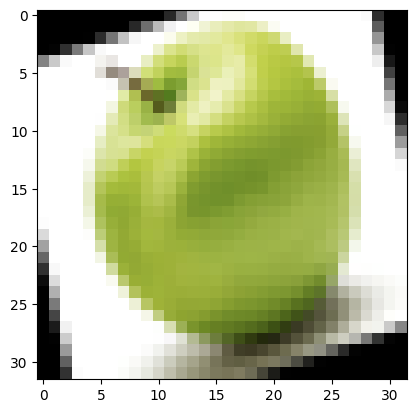

In [16]:
from sklearn.model_selection import train_test_split
plt.imshow(X_train[0])
plt.show()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [17]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [18]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test)
print(f'Accuracy: {score[1]}')
model.save('train_model.h5')

Epoch 1/10
554/554 [==============================] - 15s 24ms/step - loss: 0.4298 - accuracy: 0.7877 - val_loss: 0.3002 - val_accuracy: 0.8723
Epoch 2/10
554/554 [==============================] - 13s 23ms/step - loss: 0.2734 - accuracy: 0.8805 - val_loss: 0.2294 - val_accuracy: 0.9038
Epoch 3/10
554/554 [==============================] - 14s 25ms/step - loss: 0.2112 - accuracy: 0.9116 - val_loss: 0.2005 - val_accuracy: 0.9206
Epoch 4/10
554/554 [==============================] - 13s 24ms/step - loss: 0.1723 - accuracy: 0.9291 - val_loss: 0.1742 - val_accuracy: 0.9270
Epoch 5/10
554/554 [==============================] - 13s 23ms/step - loss: 0.1486 - accuracy: 0.9395 - val_loss: 0.1573 - val_accuracy: 0.9401
Epoch 6/10
554/554 [==============================] - 13s 23ms/step - loss: 0.1247 - accuracy: 0.9512 - val_loss: 0.1313 - val_accuracy: 0.9489
Epoch 7/10
554/554 [==============================] - 13s 23ms/step - loss: 0.1089 - accuracy: 0.9566 - val_loss: 0.1391 - val_accuracy: